In [1]:
from numpy import *
from pandas import *
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
set_option('display.max_columns',None) 

In [2]:
data=read_excel('Automobile_data.xlsx')
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

#        

In [4]:
#function to show some information about the column like type & value_counts & missing_values.
def show_info(col):
    print(f'Type of {col} : {data[col].dtype}')
    print(data[col].value_counts())
    print(f'Number of missing values : {data[col].isnull().sum()}')

In [5]:
def show_distribution_outliers(col):
    f=plt.figure(figsize=(20,9))
    ax=f.add_subplot(121)
    sns.boxplot(data=data,x=col,ax=ax)
    ax.set_title('Show outliers')

    ax=f.add_subplot(122)
    data.hist(col,ax=ax)
    ax.set_title(f'{col} Distribution')

#               

# Data Cleaning & Some Visualization

In [6]:
data['normalized-losses']=to_numeric(data['normalized-losses'],downcast='integer',errors='coerce')

In [7]:
show_info('normalized-losses')

Type of normalized-losses : float64
161.0    11
91.0      8
150.0     7
104.0     6
128.0     6
134.0     6
102.0     5
85.0      5
103.0     5
168.0     5
74.0      5
95.0      5
94.0      5
65.0      5
122.0     4
148.0     4
118.0     4
93.0      4
106.0     4
115.0     3
125.0     3
83.0      3
101.0     3
137.0     3
154.0     3
188.0     2
81.0      2
192.0     2
158.0     2
145.0     2
113.0     2
110.0     2
153.0     2
129.0     2
194.0     2
197.0     2
87.0      2
89.0      2
119.0     2
164.0     2
108.0     2
231.0     1
107.0     1
78.0      1
256.0     1
98.0      1
121.0     1
77.0      1
142.0     1
90.0      1
186.0     1
Name: normalized-losses, dtype: int64
Number of missing values : 41


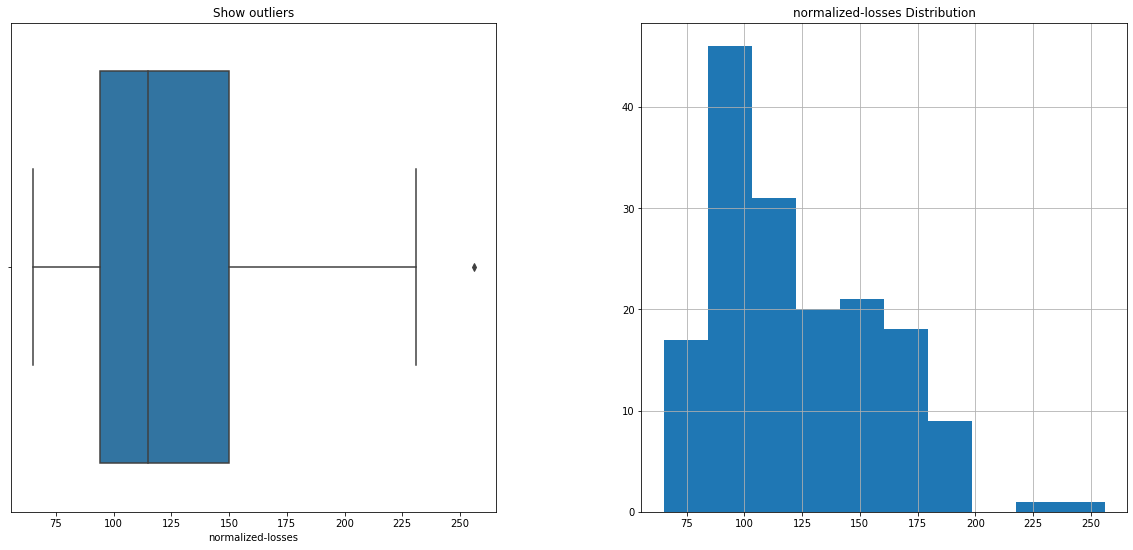

In [8]:
# show the outliers of the column & his distribution
show_distribution_outliers('normalized-losses')

### From the plots :
-the biggest normalized losses is in range 100 to 125

In [9]:
#In this case , the best way to refill the missing values is median
data.fillna({'normalized-losses':data['normalized-losses'].median()},inplace=True)

In [10]:
data['normalized-losses'].isnull().sum()

0

#                

In [11]:
show_info('make')

Type of make : object
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
audi              7
saab              6
porsche           5
isuzu             4
jaguar            3
alfa-romero       3
chevrolet         3
renault           2
mercury           1
Name: make, dtype: int64
Number of missing values : 0


In [12]:
#function to show the precentage of each column in the plot
def show_percent(col):
    plt.figure(figsize=(20,12))
    ax=sns.countplot(data=data,x=col)
    plt.xticks(rotation=90)
    plt.title(f'{col} Distribution')
    
    total=float(len(data))
    for p in ax.patches:
        height=p.get_height()
        percent=(height*100)/total
        ax.text(p.get_x()+p.get_width()/2,height+1,'{:.0f}%'.format(percent),ha='center',weight='bold',fontsize=20)

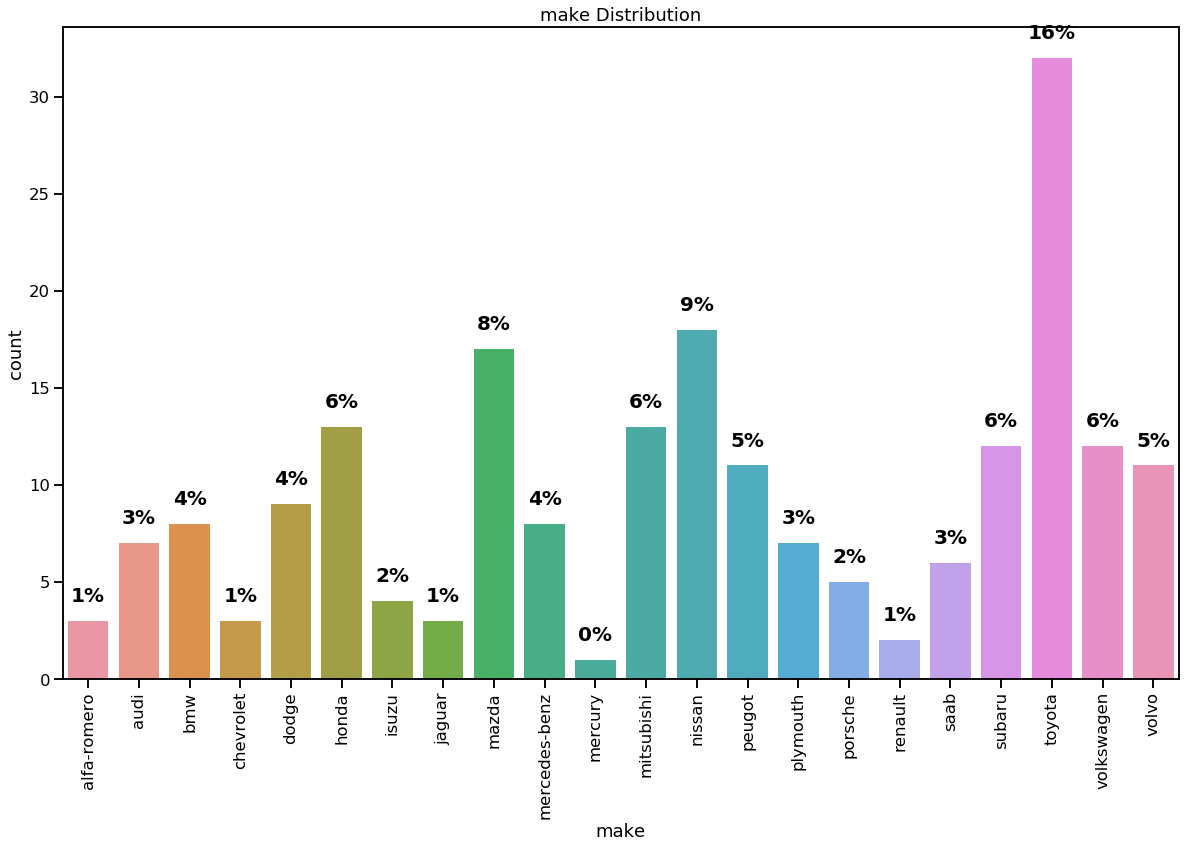

In [13]:
sns.set_context('talk')
show_percent('make')

#         

In [14]:
show_info('fuel-type')

Type of fuel-type : object
gas       185
diesel     20
Name: fuel-type, dtype: int64
Number of missing values : 0


In [15]:
def show_pieplot(col):
    plt.figure(figsize=(10,7))
    x=data[col].value_counts()
    plt.pie(x.values,autopct='%1.1f%%',labels=x.index.tolist());
    plt.title(f'{col} Distribution')
    

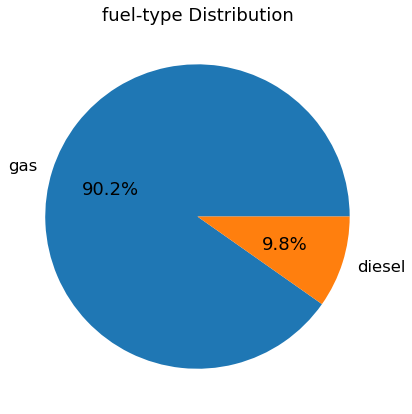

In [16]:
show_pieplot('fuel-type')

#              

In [17]:
show_info('aspiration')

Type of aspiration : object
std      168
turbo     37
Name: aspiration, dtype: int64
Number of missing values : 0


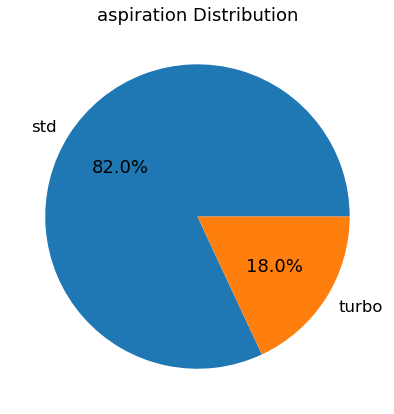

In [18]:
show_pieplot('aspiration')

#                

In [19]:
show_info('num-of-doors')

Type of num-of-doors : object
four    114
two      89
?         2
Name: num-of-doors, dtype: int64
Number of missing values : 0


In [20]:
#The missing values of num-of-doors will be refilled by 'four'
data['num-of-doors']=data['num-of-doors'].replace('?','four')

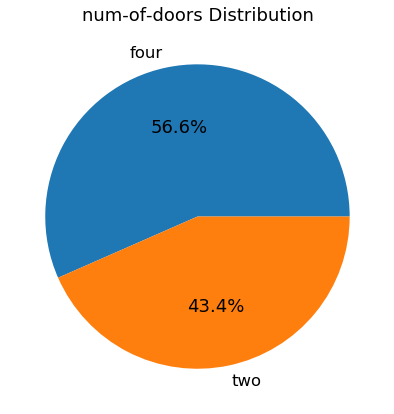

In [21]:
show_pieplot('num-of-doors')

### The most popular num-of-doors in data is four....but there are no big difference numbers between them

In [22]:
data.loc[data['num-of-doors']=='four','num-of-doors']=4
data.loc[data['num-of-doors']=='two','num-of-doors']=2

In [23]:
show_info('num-of-doors')

Type of num-of-doors : object
4    116
2     89
Name: num-of-doors, dtype: int64
Number of missing values : 0


In [24]:
# convert object type to int
data['num-of-doors']=to_numeric(data['num-of-doors'],errors='coerce')

In [25]:
data['num-of-doors'].dtype

dtype('int64')

#                

In [26]:
show_info('body-style')

Type of body-style : object
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: body-style, dtype: int64
Number of missing values : 0


<Figure size 864x576 with 0 Axes>

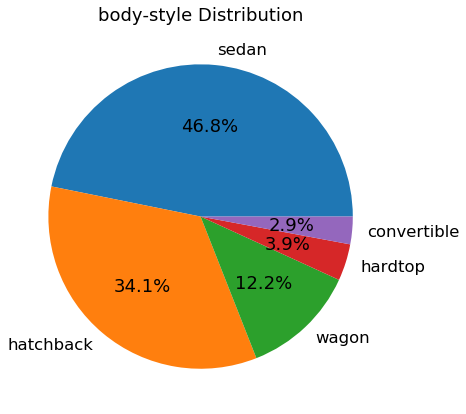

In [27]:
plt.figure(figsize=(12,8))
show_pieplot('body-style')

### The most used is the sedan. 
### The second is the hatchback.

#                  

In [28]:
show_info('symboling')

Type of symboling : int64
 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64
Number of missing values : 0


In [29]:
# In this column , we can observe that it has unsigned values like -1 and -2
# This values will be replaced by 0
data['symboling']=data['symboling'].replace(-1,0)
data['symboling']=data['symboling'].replace(-2,0)

In [30]:
show_info('symboling')

Type of symboling : int64
0    92
1    54
2    32
3    27
Name: symboling, dtype: int64
Number of missing values : 0


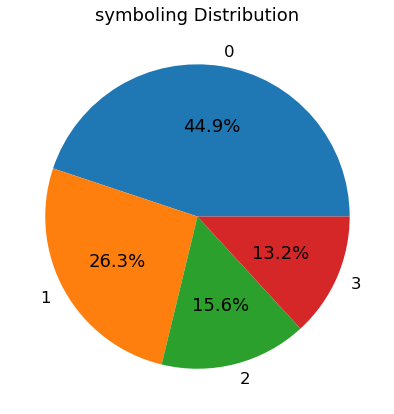

In [31]:
show_pieplot('symboling')

###  Most of cars have no symbols . Some cars have one symbol.

#              

In [32]:
show_info('price')

Type of price : object
?        4
8921     2
6229     2
9279     2
18150    2
        ..
7053     1
12964    1
16430    1
7126     1
40960    1
Name: price, Length: 187, dtype: int64
Number of missing values : 0


In [33]:
data['price']=to_numeric(data['price'],errors='coerce')

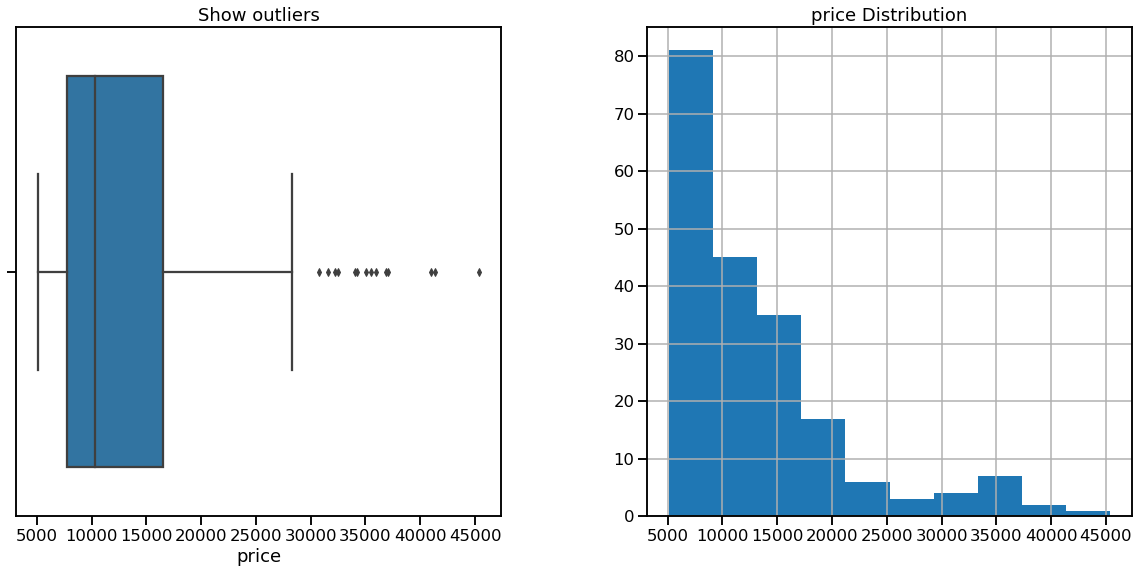

In [34]:
show_distribution_outliers('price')

In [35]:
# Also in this case , the best way to refill the missing values is median
data.fillna({'price':data['price'].median()},inplace=True)

count      205.000000
mean     13150.307317
std       7879.121326
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

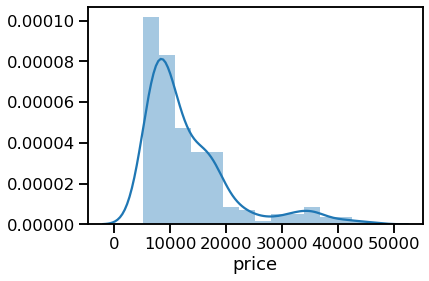

In [36]:
sns.distplot(data['price'])
data['price'].describe()

#                          

In [37]:
show_info('drive-wheels')

Type of drive-wheels : object
fwd    120
rwd     76
4wd      9
Name: drive-wheels, dtype: int64
Number of missing values : 0


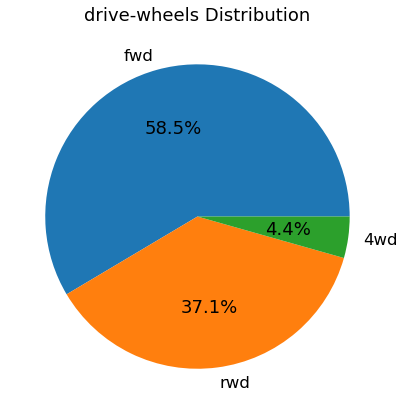

In [38]:
show_pieplot('drive-wheels')

### The most common drive-wheels is fwd

#             

In [39]:
show_info('engine-location')

Type of engine-location : object
front    202
rear       3
Name: engine-location, dtype: int64
Number of missing values : 0


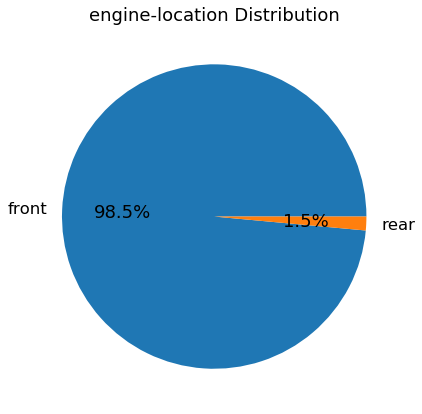

In [40]:
show_pieplot('engine-location')

### engine-location the cars are usually in front of the car

#           

In [41]:
show_info('engine-type')

Type of engine-type : object
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: engine-type, dtype: int64
Number of missing values : 0


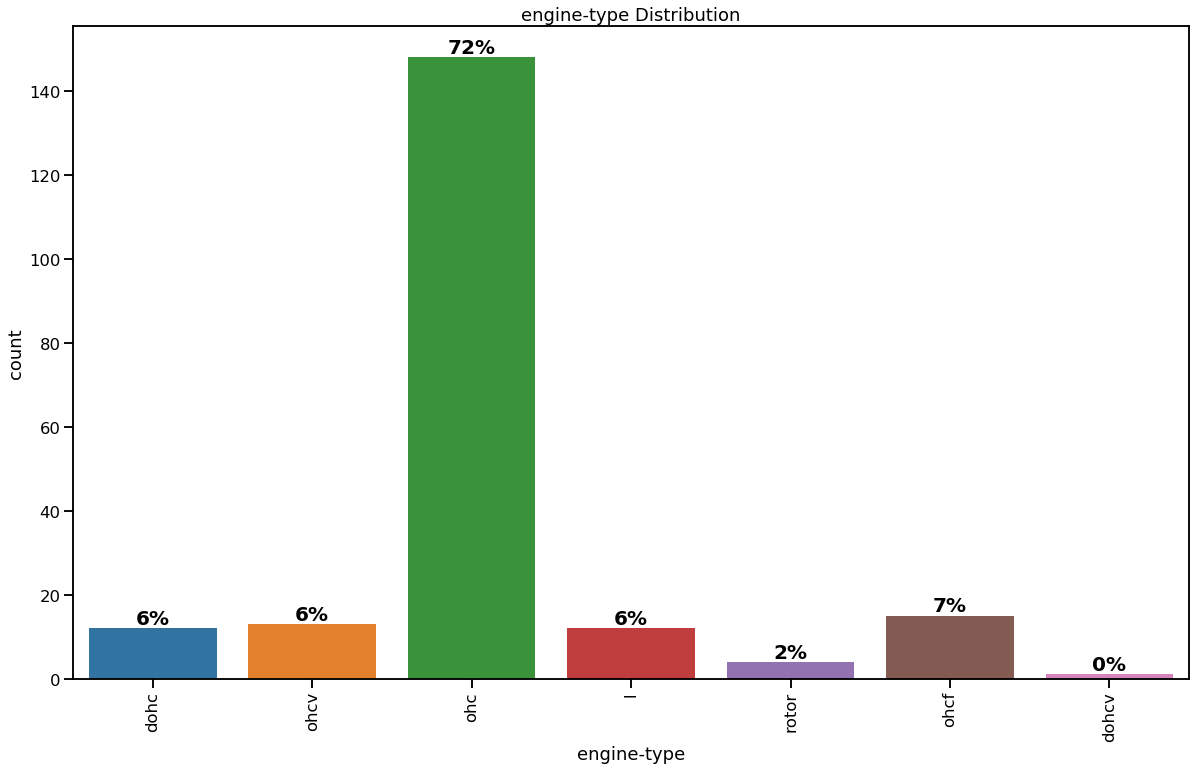

In [42]:
sns.set_context('talk')
show_percent('engine-type')

#             

In [43]:
show_info('num-of-cylinders')

Type of num-of-cylinders : object
four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: num-of-cylinders, dtype: int64
Number of missing values : 0


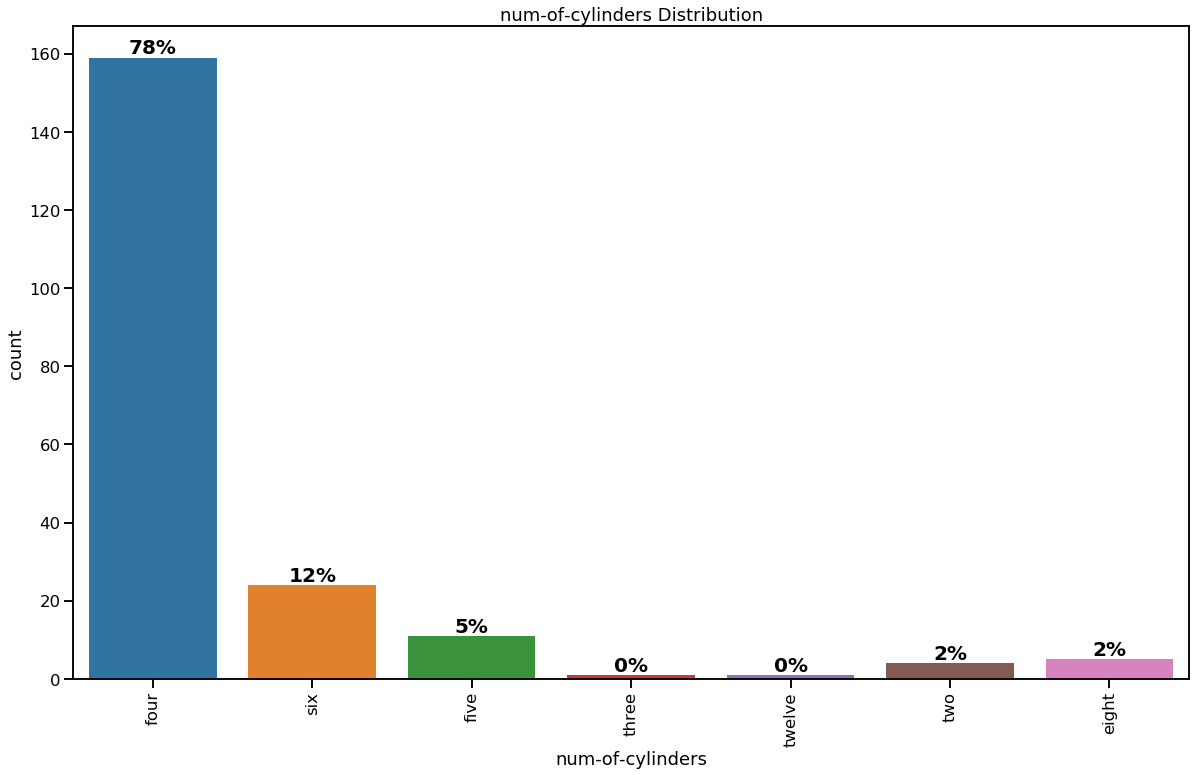

In [44]:
show_percent('num-of-cylinders')

#       

In [45]:
show_info('fuel-system')

Type of fuel-system : object
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuel-system, dtype: int64
Number of missing values : 0


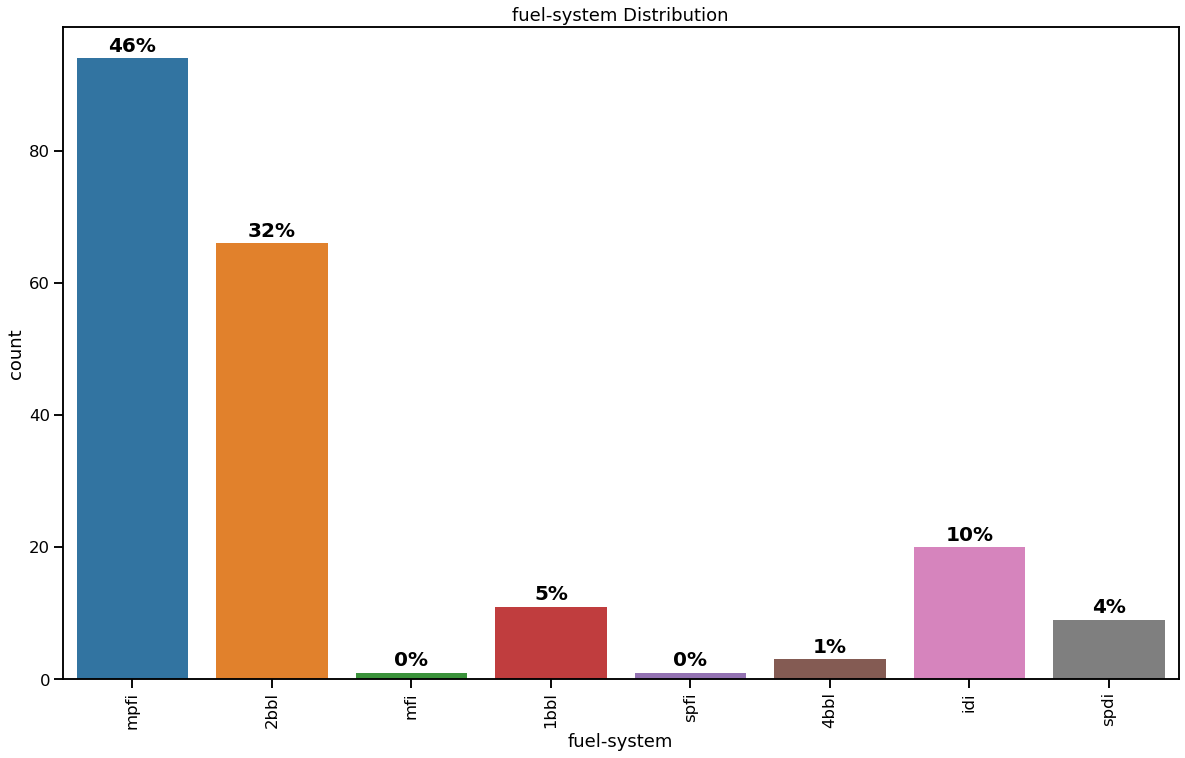

In [46]:
show_percent('fuel-system')

#                    

In [47]:
show_info('bore')

Type of bore : object
3.62    23
3.19    20
3.15    15
3.03    12
2.97    12
3.46     9
3.78     8
3.31     8
3.43     8
3.27     7
2.91     7
3.39     6
3.54     6
3.05     6
3.58     6
3.01     5
3.7      5
?        4
3.35     4
3.59     3
3.74     3
3.17     3
3.24     2
3.47     2
3.94     2
3.13     2
3.63     2
3.5      2
3.33     2
3.8      2
2.54     1
3.6      1
3.76     1
2.92     1
3.08     1
2.99     1
2.68     1
3.34     1
3.61     1
Name: bore, dtype: int64
Number of missing values : 0


In [48]:
data['bore']=to_numeric(data['bore'],errors='coerce')

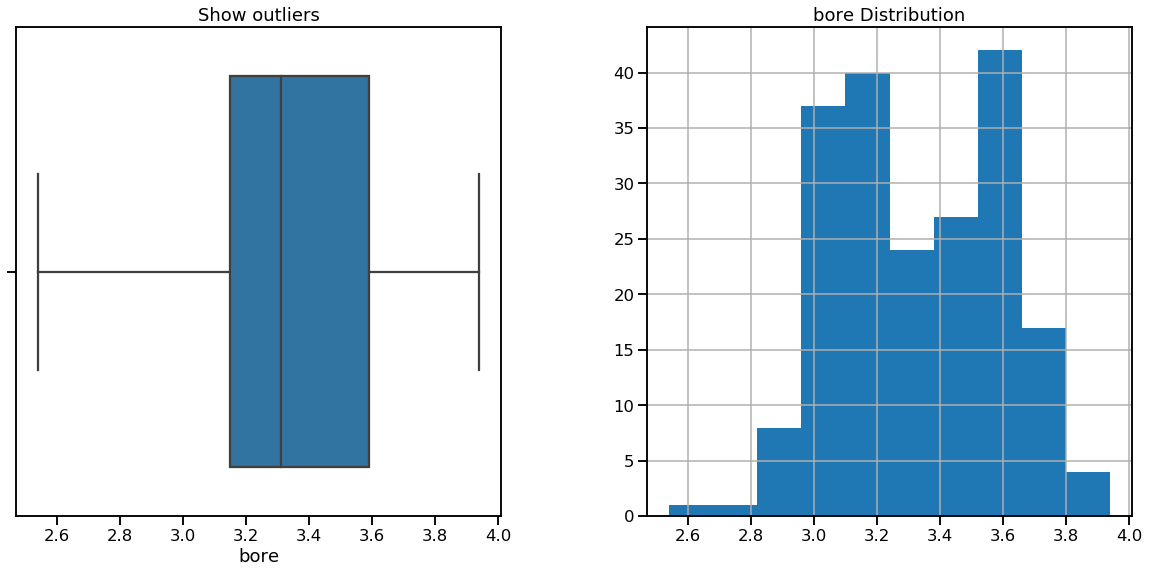

In [49]:
# show the outliers of the column & his distribution
show_distribution_outliers('bore')

In [50]:
# There is no outliers , so we can refill missing values by median or mean.
data.fillna({'bore':data['bore'].median()},inplace=True)

In [51]:
data['stroke']=to_numeric(data['stroke'],errors='coerce')

#         

In [52]:
data['horsepower']=to_numeric(data['horsepower'],errors='coerce')

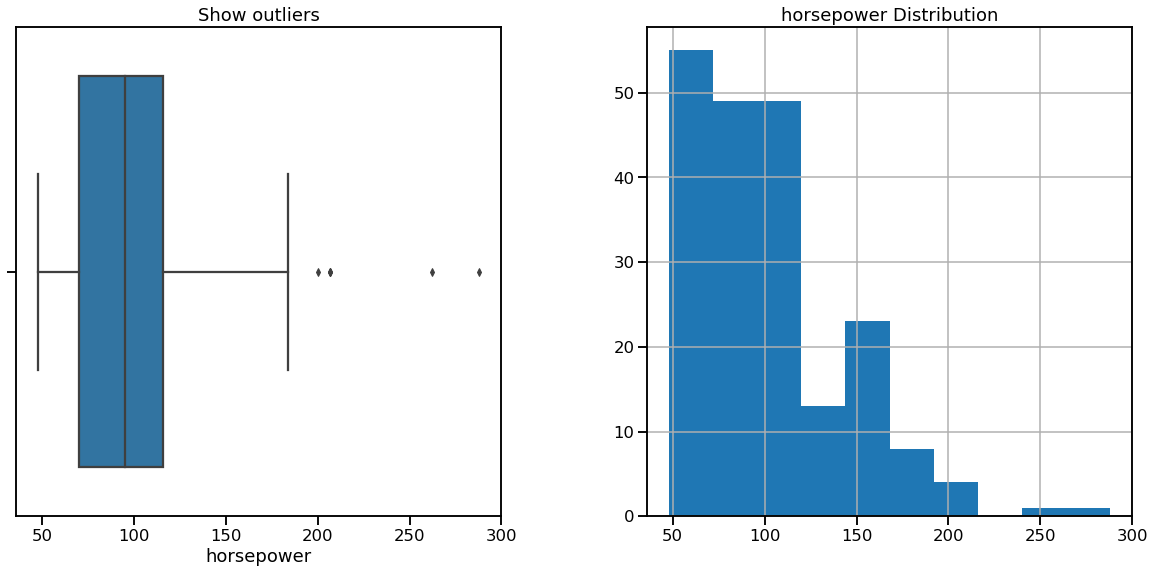

In [53]:
show_distribution_outliers('horsepower')

In [54]:
# refill missing values by median
data.fillna({'horsepower':data['horsepower'].median()},inplace=True)

#         

In [55]:
data['peak-rpm']=to_numeric(data['peak-rpm'],errors='coerce')

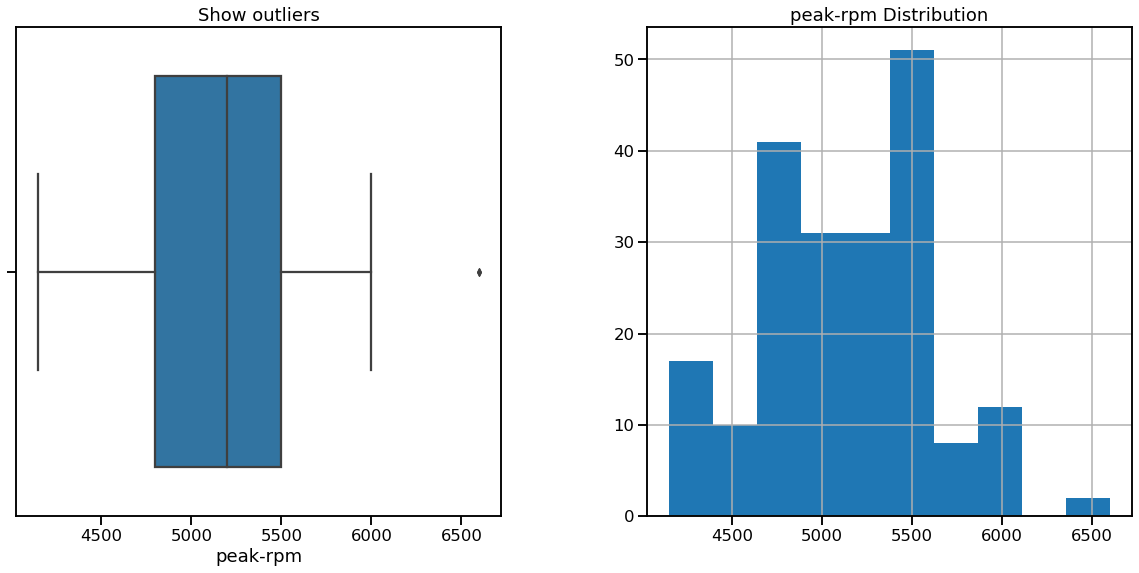

In [56]:
show_distribution_outliers('peak-rpm')

In [57]:
# There is outlier in column.
data.fillna({'peak-rpm':data['peak-rpm'].median()},inplace=True)

#           

# Let's make some insights from data

Text(0.5, 1.0, 'Relation between type of the car & price according to body style')

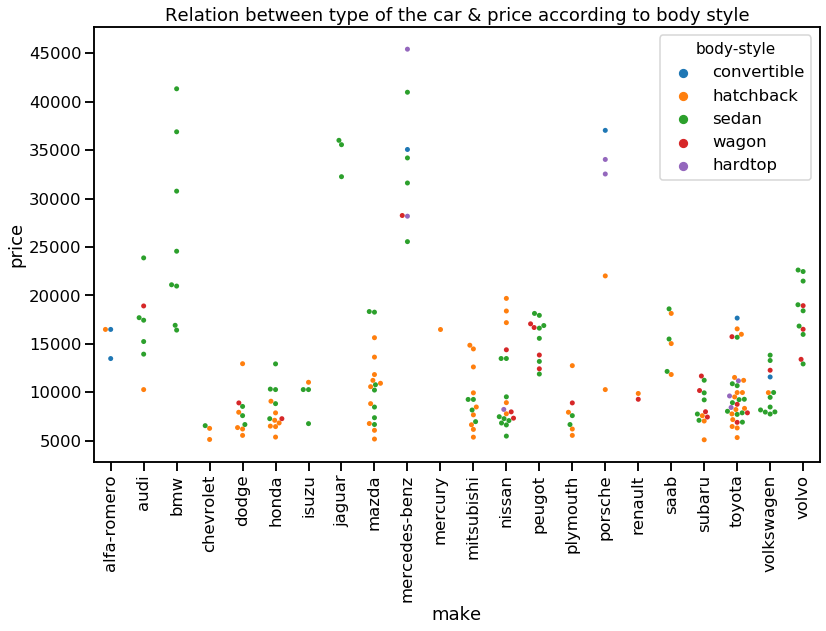

In [58]:
plt.figure(figsize=(13,8))
sns.swarmplot(data=data,x='make',y='price',hue='body-style')
plt.xticks(rotation=90)
plt.title('Relation between type of the car & price according to body style')

### AS we see in this plot, we can note that :
- Mercedes-Benz is the highest price and the body style of the highest price is a hardtop.
- Mercedes-Benz made many kinds of body styles like a wagon, sedan, convertible, and hardtop. 
- The second highest in prices is BMW.
- The only kind that BMW works on is a sedan.
- Also Porsche has high prices. It made different kinds of body types like hatchback, convertible, and hardtop.

#               

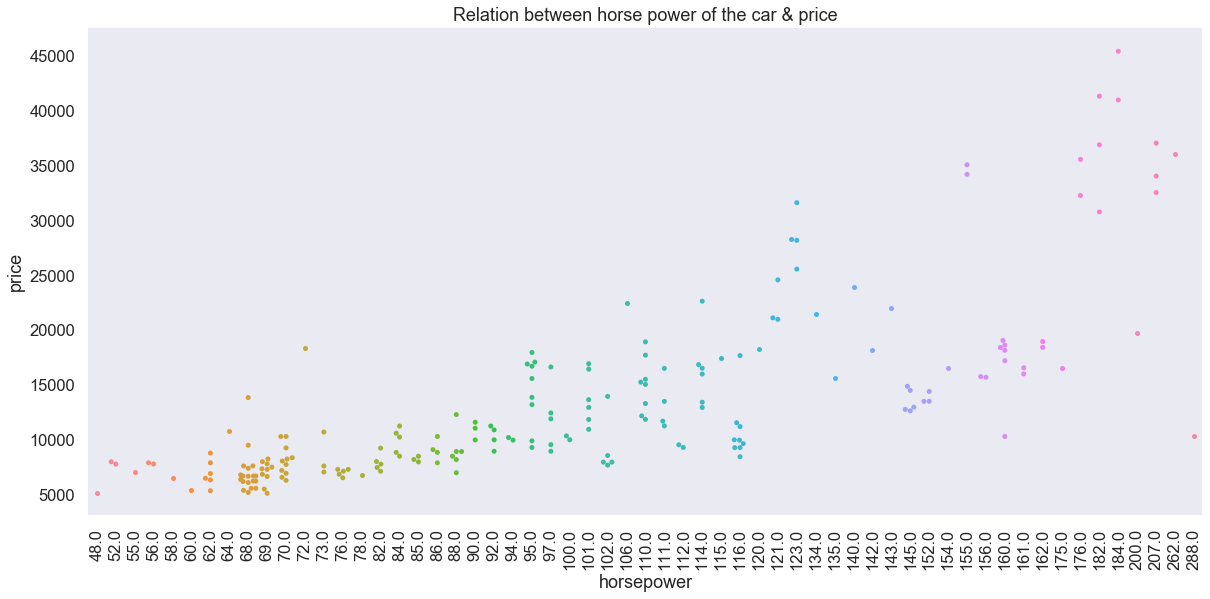

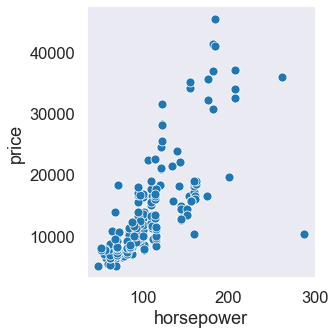

In [59]:
sns.set_style('dark')
f=plt.figure(figsize=(20,9))
plt.title('Relation between horse power of the car & price')
sns.swarmplot(data=data,x='horsepower',y='price')
plt.xticks(rotation=90);

sns.relplot(data=data,x='horsepower',y='price');

### There is a strong relation between horsepower and price (Positive relationship).

In [60]:
# We can see this relation by numbers using correlation.
data.corr()['price'][12:13]

horsepower    0.749919
Name: price, dtype: float64

#             

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 <a list of 22 Text xticklabel objects>)

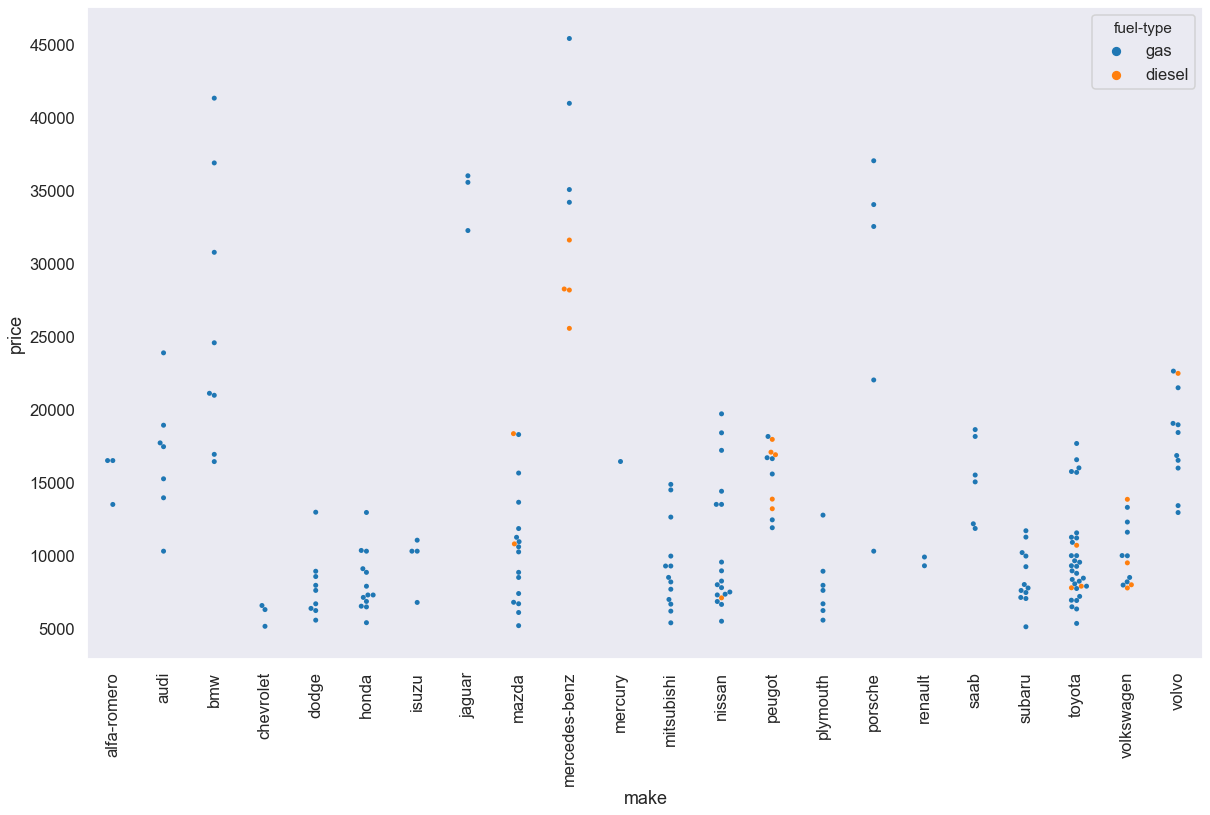

In [61]:
plt.figure(figsize=(20,12))
sns.swarmplot(data=data,x='make',y='price',hue='fuel-type')
plt.xticks(rotation=90)

- Most cars use gas.
- Mercedes-Benz uses gas and diesel. And other kinds of cars do that
- BMW does not use diesel.

#             

Text(0.5, 1, 'Relation between type of the car & price according to drive wheels')

<Figure size 1800x576 with 0 Axes>

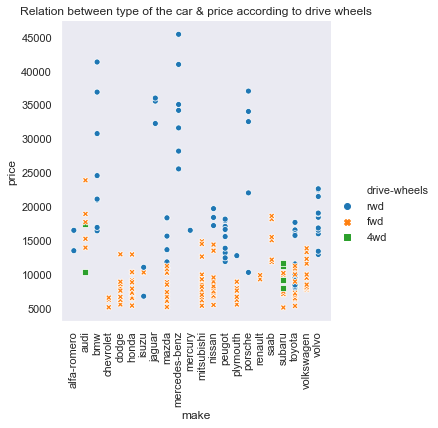

In [62]:
sns.set_context('notebook')
plt.figure(figsize=(25,8))
sns.relplot(data=data,x='make',y='price',style='drive-wheels',hue='drive-wheels')
plt.xticks(rotation=90);
plt.title('Relation between type of the car & price according to drive wheels')

## Let's show what does affect to price?

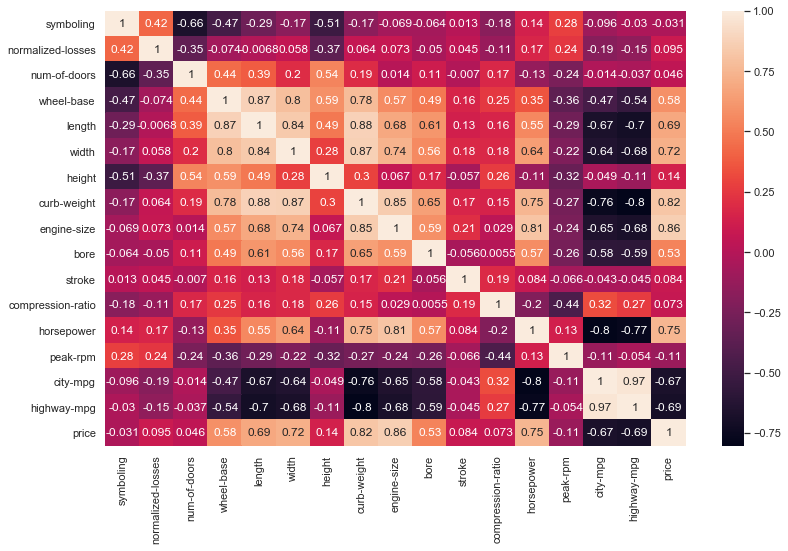

In [63]:
plt.figure(figsize=(13,8))
sns.heatmap(data.corr(),annot=True)

In [64]:
data.corr()['price'].sort_values(ascending=False)

price                1.000000
engine-size          0.860343
curb-weight          0.819817
horsepower           0.749919
width                0.724558
length               0.686567
wheel-base           0.584847
bore                 0.532861
height               0.140439
normalized-losses    0.095489
stroke               0.083716
compression-ratio    0.072890
num-of-doors         0.046497
symboling           -0.030740
peak-rpm            -0.107283
city-mpg            -0.668822
highway-mpg         -0.693037
Name: price, dtype: float64

### A lot of fields affect to price of the car :
- engine-size
- curb-weight          
- horsepower           
- width          
- length              
- wheel-base           
- bore   

We don't have to forget that body style affect the price also.

#      

Text(0.5, 1.0, 'Relation between the type of the car & price according to engine type')

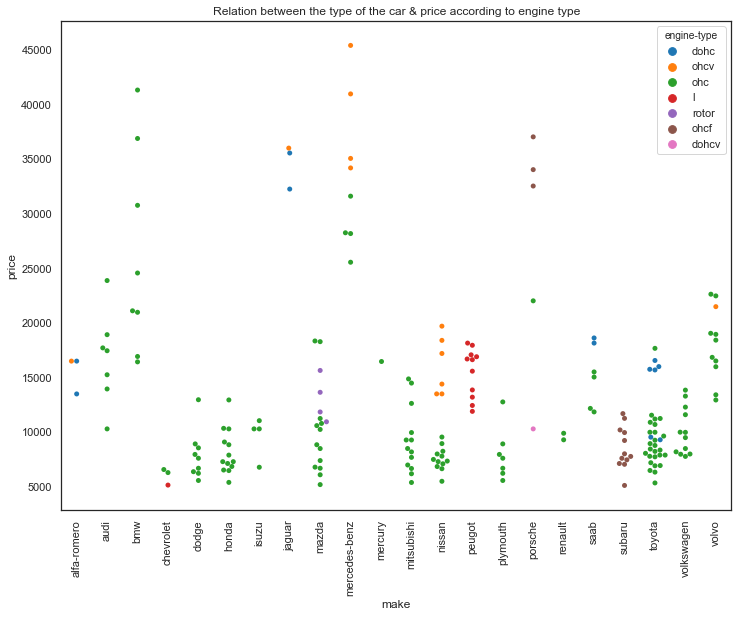

In [65]:
sns.set_style('white')
plt.figure(figsize=(12,9))
sns.swarmplot(data=data,x='make',y='price',hue='engine-type')
plt.xticks(rotation=90);
plt.title('Relation between the type of the car & price according to engine type')

### Some conclusions from this plot :
- Mercedes-Benz is also different from others. It always works on any kind of one feature. 
- In this plot, It used many types of an engine like ohc, ohcv. The highest price is ohcv.
- BMW works on ohc only.
- Always ohcv costs higher and a few use it in their cars like Mercedes-Benz and Nissan.
- A cheaper car uses och, and it's common used in all.

#        

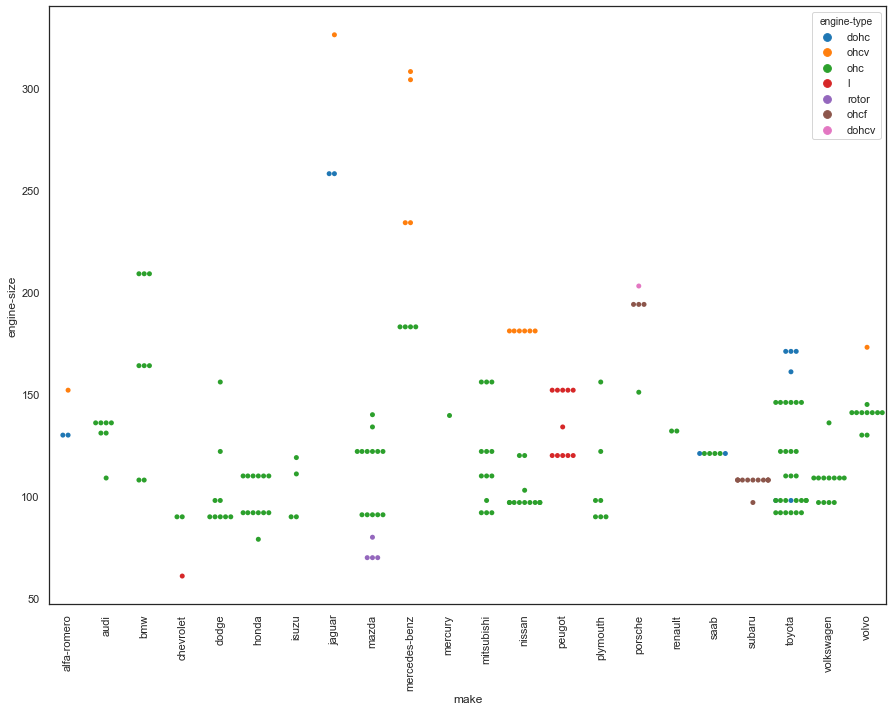

In [66]:
plt.figure(figsize=(15,11))
sns.swarmplot(data=data,x='make',y='engine-size',hue='engine-type')
plt.xticks(rotation=90);

<Figure size 1584x1080 with 0 Axes>

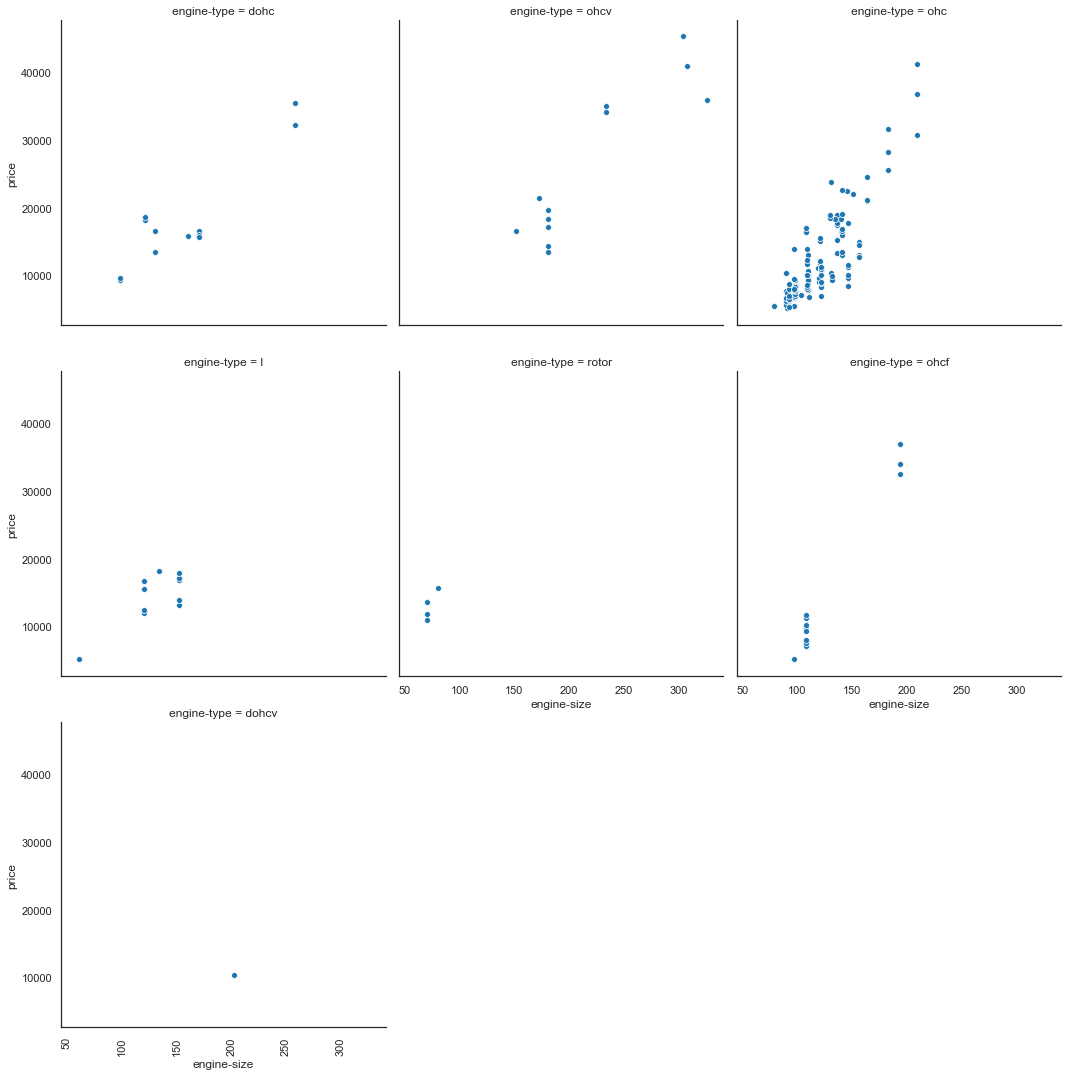

In [67]:
plt.figure(figsize=(22,15))
sns.relplot(data=data,x='engine-size',y='price',col='engine-type',col_wrap=3)
plt.xticks(rotation=90);

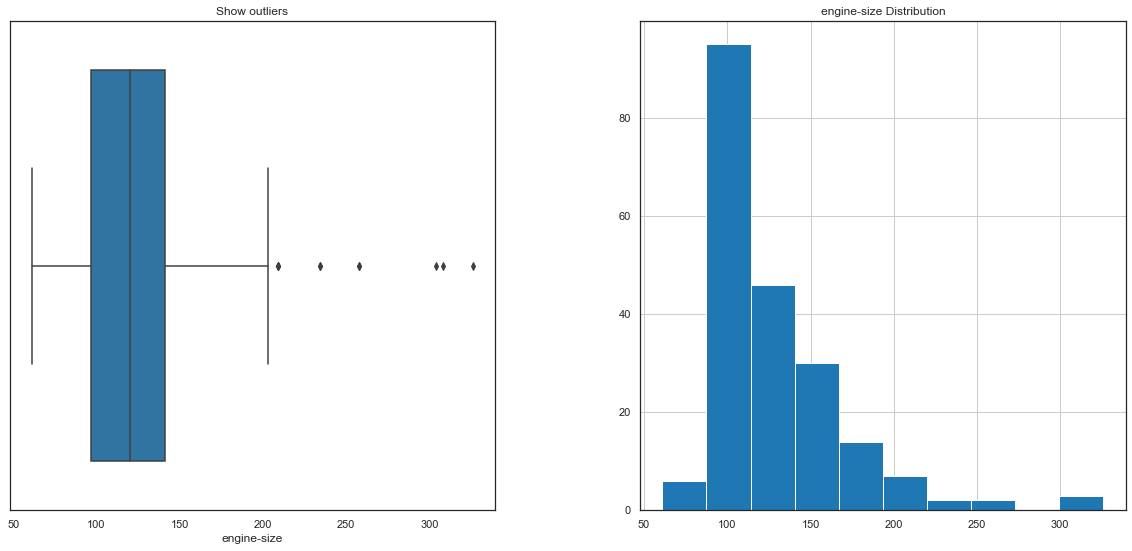

In [68]:
show_distribution_outliers('engine-size')

Text(0.5, 1, 'Ranges of engine size according to engine type')

<Figure size 1080x576 with 0 Axes>

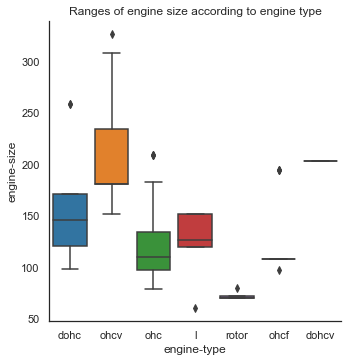

In [69]:
plt.figure(figsize=(15,8))
sns.catplot(data=data,y='engine-size',x='engine-type',kind='box')
plt.title('Ranges of engine size according to engine type')

### From these a lot of plots, this is the conclusion:
- The common size engine is from 100 to 150.
- The bigger size engine, The higher price.
- Ohcv has different sizes of the engine from 150 to 300 and higher than it.

#             

In [70]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115.0,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,115.0,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,115.0,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,4,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,4,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [71]:
# We need to transform object data type to numeric to prepare it for modeling.
# I will use LabelEncoder to do this.
label_en=LabelEncoder()
cols=data.dtypes==object
cols=data.columns[cols].tolist()
data[cols]=data[cols].apply(lambda cols:label_en.fit_transform(cols))

In [72]:
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115.0,0,1,0,2,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,115.0,0,1,0,2,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,115.0,0,1,0,2,2,2,0,94.5,171.2,65.5,52.4,2823,5,3,152,5,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,1,1,0,4,3,1,0,99.8,176.6,66.2,54.3,2337,3,2,109,5,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,1,1,0,4,3,0,0,99.4,176.6,66.4,54.3,2824,3,1,136,5,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


#### Now, data is prepared for modeling.